In [1]:
# download on https://yanweifu.github.io/FG_NET_data/

In [2]:
import pandas as pd

from pathlib import Path

In [3]:
filter_non_numeric = lambda s: ''.join(c for c in s if c.isdigit())
filter_numeric = lambda s: ''.join(c for c in s if not c.isdigit())

In [4]:
def read_dataset(dataset_dir):
    current_path = Path('.')
    dataset_path = Path(dataset_dir)
    dataset = []
    for file in dataset_path.glob('**/*'):
        if file.suffix not in ['.jpg','.JPG']:
            print(f'File with extension different than .jpg. File extension found: {file.suffix}')
        else:
            filename = file.stem
            attributes = filename.split('A')
            
            raw_person_id = attributes[0]
            raw_age = attributes[1]
            
            photo_id_suffix = 'a' 
            
            if not raw_age.isnumeric():
                raw_age = filter_non_numeric(raw_age)
                photo_id_suffix = filter_numeric(raw_age)
            
            data = {
                'person_id': raw_person_id,
                'photo_id': f'{raw_person_id}{photo_id_suffix}',
                'age': int(raw_age),
                'filepath': str(file.relative_to(current_path))
            }
            dataset.append(data)
    return dataset

In [5]:
dataset_data = read_dataset('../datasets/fg-net/FGNET/FGNET/images')

In [6]:
df = pd.DataFrame(dataset_data)

df.head()

,person_id,photo_id,age,filepath
0,001,001a,2,../datasets/fg-net/FGNET/FGNET/images/001A02.JPG
1,001,001a,5,../datasets/fg-net/FGNET/FGNET/images/001A05.JPG
2,001,001a,8,../datasets/fg-net/FGNET/FGNET/images/001A08.JPG
3,001,001a,10,../datasets/fg-net/FGNET/FGNET/images/001A10.JPG
4,001,001a,14,../datasets/fg-net/FGNET/FGNET/images/001A14.JPG


<AxesSubplot:>

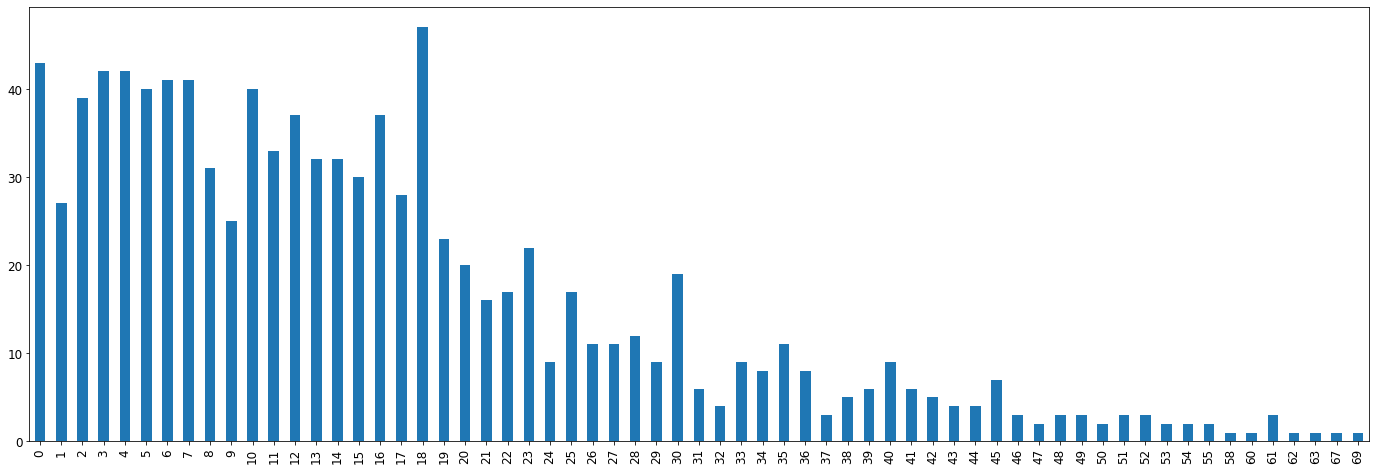

In [7]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [8]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [9]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  63.87%
